## Dataset Description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Unduh dataset yang akan digunakan [disini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Input variables:
#bank client data:
1.   age (numeric),
2.   job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Import Library


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Melakukan import standar library yang digunakan dalam menjalankan notebook.

# Loading Dataset


In [12]:
df = pd.read_csv('/content/bank-additional.csv', sep=';')

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
df.shape

(4119, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
#nilai 999 dapat didefinisikan sebagai belum ada kontak sehingga dapat dianggap nilainya 0
df['pdays'] = df['pdays'].replace(999, 0)


In [18]:
#terdapat unkown dimana yang berarti tidak terdapat nilai
df = df.replace('unknown', np.NaN)


In [19]:
#melakukan sum pada nan yang ada
df.isna().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [20]:
#menghilangkan nilai nan
df = df.dropna()

In [21]:
df.shape

(3090, 21)

In [22]:
#deskripsi dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,259.244984,2.509385,0.259547,0.208091,-0.046796,93.532223,-40.618608,3.481706,5161.138706
std,10.184002,263.960200,2.598168,1.421274,0.560141,1.596276,0.585886,4.746448,1.770016,76.482157
min,20.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,31.000000,104.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,315.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,21.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


pada loading data set dilakukan tindakan menghilangkan unknown yang dianggap tidak ada nilai.

# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


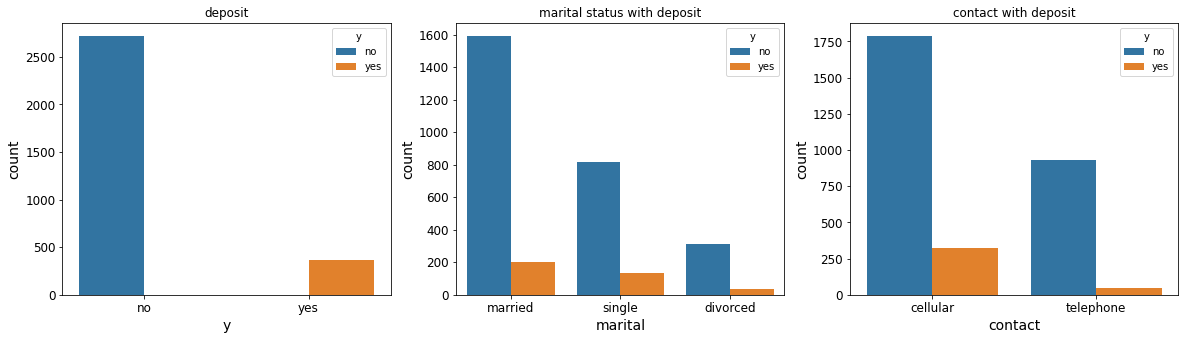

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.title("deposit")
sns.countplot("y",data=df,hue="y")
plt.subplot(132)
plt.title("marital status with deposit")
sns.countplot("marital",data=df,hue="y")
plt.subplot(133)
plt.title("contact with deposit")
sns.countplot("contact",data=df,hue="y")

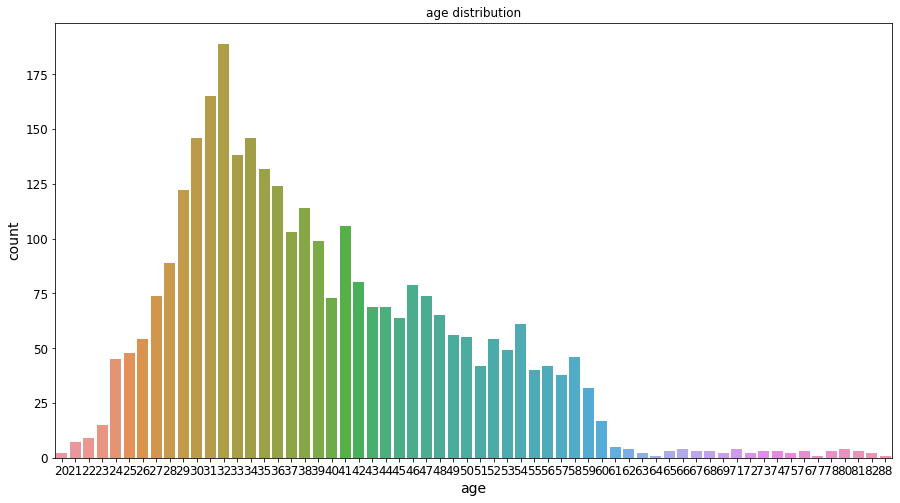

In [24]:
plt.figure(figsize=(15,8))
plt.title("age distribution")
sns.countplot(x="age",data=df)
plt.show()

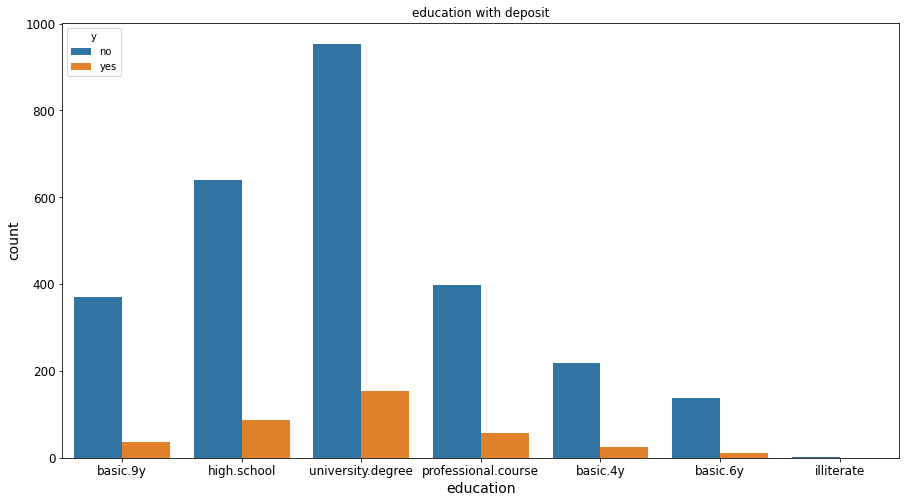

In [25]:
fig = plt.subplots(figsize=(15,8))
plt.title("education with deposit")
sns.countplot(data=df,x='education',hue="y")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


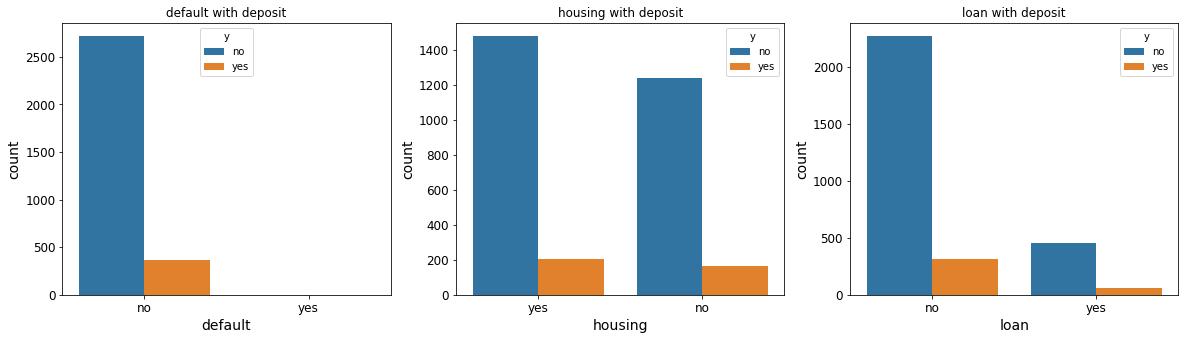

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("default with deposit")
sns.countplot("default",data=df,hue="y")
plt.subplot(132)
plt.title("housing with deposit")
sns.countplot("housing",data=df,hue="y")
plt.subplot(133)
plt.title("loan with deposit")
sns.countplot("loan",data=df,hue="y")

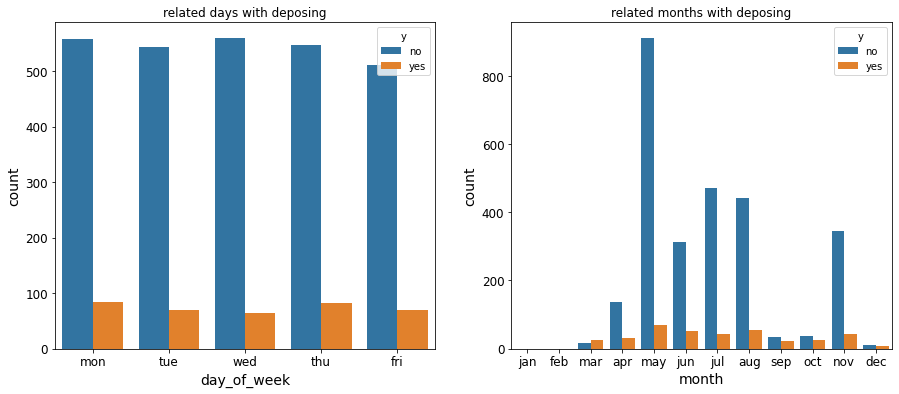

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("related days with deposing")
sns.countplot(x="day_of_week",hue="y",data=df,order=('mon','tue','wed','thu','fri'))
plt.subplot(122)
plt.title("related months with deposing")
sns.countplot(x="month",hue="y",data=df,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

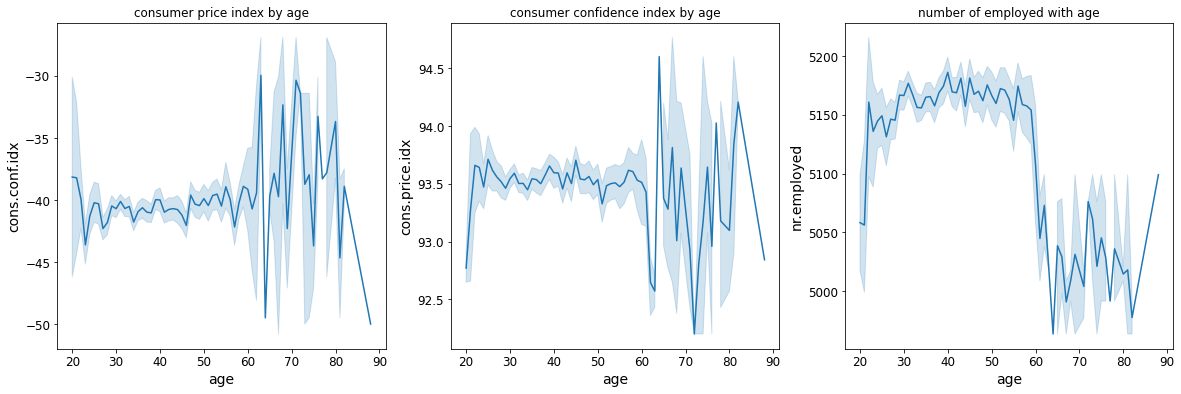

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.title("consumer price index by age")
sns.lineplot(data=df, x='age', y='cons.conf.idx')
plt.subplot(132)
plt.title("consumer confidence index by age")
sns.lineplot(data=df, x='age', y='cons.price.idx')
plt.subplot(133)
plt.title("number of employed with age")
sns.lineplot(data=df, x='age', y='nr.employed')

Melihat gambaran secara sederhana berdasarkan status deposit untuk beberapa kolom yang ada.

# Preprocessing

In [29]:
df_new = df.copy()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['job'] = le.fit_transform(df_new['job'])
df_new['education'] = le.fit_transform(df_new['education'])
df_new['default'] = le.fit_transform(df_new['default'])
df_new['marital'] = le.fit_transform(df_new['marital'])
df_new['housing'] = le.fit_transform(df_new['housing'])
df_new['loan'] = le.fit_transform(df_new['loan'])
df_new['contact'] = le.fit_transform(df_new['contact'])
df_new['poutcome'] = le.fit_transform(df_new['poutcome'])
df_new['month'] = le.fit_transform(df_new['month'])
df_new['day_of_week'] = le.fit_transform(df_new['day_of_week'])
df_new['y'] = le.fit_transform(df_new['y'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,3.816505,1.195146,3.904207,0.000324,0.546278,0.164078,0.317799,4.317476,2.019741,259.244984,2.509385,0.259547,0.208091,0.924919,-40.618608,3.481706,0.119741
std,10.184002,3.618992,0.618409,2.007403,0.017990,0.497934,0.370406,0.465696,2.365690,1.402236,263.960200,2.598168,1.421274,0.560141,0.390309,4.746448,1.770016,0.324711
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-50.800000,0.635000,0.000000
25%,31.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,104.000000,1.000000,0.000000,0.000000,1.000000,-42.700000,1.313000,0.000000
50%,37.000000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,181.000000,2.000000,0.000000,0.000000,1.000000,-41.800000,4.856000,0.000000
75%,46.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,315.000000,3.000000,0.000000,0.000000,1.000000,-36.400000,4.961000,0.000000
max,88.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,3643.000000,35.000000,21.000000,6.000000,2.000000,-26.900000,5.045000,1.000000


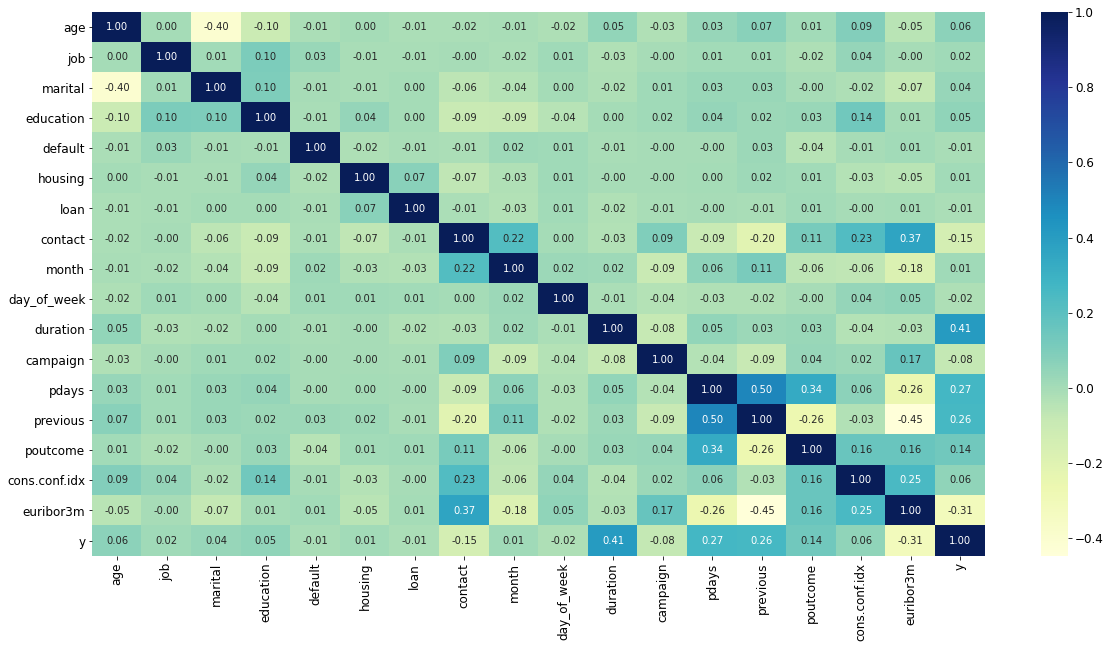

In [93]:
plt.subplots(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f', cmap="YlGnBu")

df_new.describe()

melihat hubungan antar kolom ketika nilai semakin emndekati satu maka memiliki hubungan yang kuat.

In [32]:
df_new = df_new.drop(columns=['emp.var.rate','nr.employed','cons.price.idx'], axis=0)

In [33]:
X = df_new.drop(columns=['y'])
y = df_new['y']

Split Data

In [34]:
random_state=42 #randomstate digunakan agar hasil dari model tidak berubah ubah ketika melakukan test train, nilai yang diambil sembarang

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=random_state, stratify=y_train)

In [36]:
X_train.shape

(2163, 17)

In [37]:
X_test.shape

(309, 17)

In [38]:
X_val.shape

(618, 17)

Melakukan split data untuk membuat train test serta validasi yang digunakan pada model model yang ada.

# Model and Training

In [39]:
from sklearn.preprocessing import StandardScaler,normalize

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)
X_val_trf = scaler.transform(X_val)
#standarisasi

#Model and Train

melakukan modeling serta melakukan train pada dataset yang telah dilakukan split sebelumnya.

# Logististic Regression

In [40]:
#pemilihan solver yaitu Limited-memory Broyden–Fletcher–Goldfarb–Shanno = lbfgs
from sklearn.linear_model import LogisticRegression

model_lin = LogisticRegression(solver="lbfgs", random_state=random_state)
%time model_lin.fit(X_train_trf, y_train)

CPU times: user 19.8 ms, sys: 8.04 ms, total: 27.8 ms
Wall time: 19.3 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Support Vector Machine

In [41]:
#C = 0.1 semakin besar maka margin hyperplane semakin besar atau nilai error
#kernel yang digunakan adalah linear dan poly
from sklearn.svm import SVC

model_svc_linear = SVC(kernel='linear', random_state=random_state, C=0.1) 
%time model_svc_linear.fit(X_train_trf, y_train)

CPU times: user 62.2 ms, sys: 62.4 ms, total: 125 ms
Wall time: 71.6 ms


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
#model svc kernel poly
model_svc_poly = SVC(kernel='poly', random_state=random_state,C=0.01)
%time model_svc_poly.fit(X_train_trf, y_train)

CPU times: user 51.2 ms, sys: 3.93 ms, total: 55.2 ms
Wall time: 56.9 ms


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_tree_clf = DecisionTreeClassifier(max_depth=3, random_state=random_state)
%time model_tree_clf.fit(X_train_trf, y_train)

CPU times: user 3.78 ms, sys: 0 ns, total: 3.78 ms
Wall time: 3.85 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

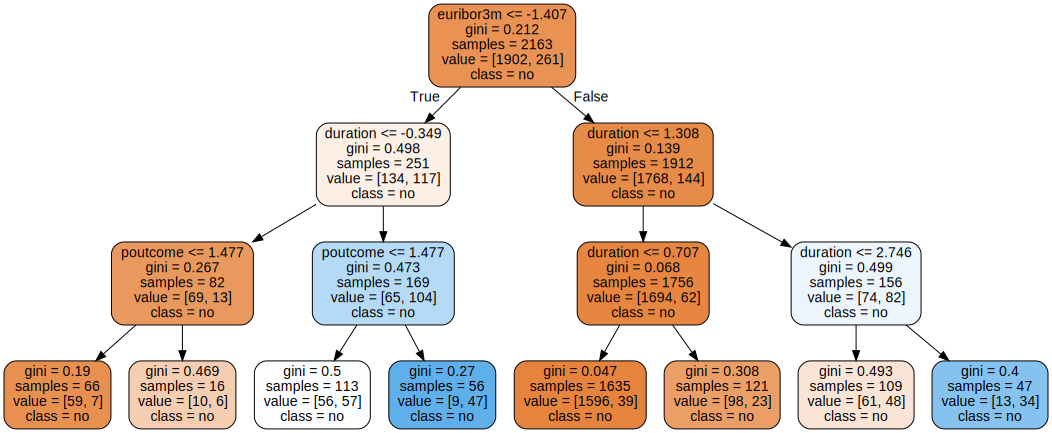

In [44]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        model_tree_clf,
        out_file=os.path.join(IMAGES_PATH, "party.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=df.y,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "party.dot"))

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model_rf_clf = RandomForestClassifier(criterion="gini",n_estimators=100)
%time model_rf_clf.fit(X_train_trf, y_train)

CPU times: user 334 ms, sys: 3.67 ms, total: 337 ms
Wall time: 339 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Adaboots

In [46]:
#n_estimator nilai ditetapkan dalam membuat berapa banyaknya nilai yang dibuat
#learning rate kemampuan machine learning dalam melakukan training test
#algorithm "SAMME.R" merupakan nilai bawaan jika parameter algorithm tidak dibuat
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    n_estimators=100, algorithm="SAMME.R", learning_rate=0.5, random_state=random_state)
%time ada_clf.fit(X_train_trf, y_train)

CPU times: user 311 ms, sys: 927 µs, total: 312 ms
Wall time: 314 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=100, random_state=42)

# Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state)
%time grad_boost_clf.fit(X_train_trf, y_train)

CPU times: user 364 ms, sys: 647 µs, total: 365 ms
Wall time: 368 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# XGBoost

In [48]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.3, n_jobs=-1)
%time xgb_clf.fit(X_train_trf, y_train)

CPU times: user 900 ms, sys: 27.5 ms, total: 927 ms
Wall time: 650 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#K-Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [50]:
model_clf_knn=KNeighborsClassifier(n_neighbors=8, weights="uniform")
%time model_clf_knn.fit(X_train_trf, y_train)

CPU times: user 13.2 ms, sys: 936 µs, total: 14.1 ms
Wall time: 15.3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

#Model Performance

Melakukan evaluasi terhadap model yang telah dibuat.

# Logistic Regression

In [51]:
from sklearn.metrics import classification_report

%time y_val_predict_lin = model_lin.predict(X_val_trf)
print(classification_report(y_val, y_val_predict_lin))

CPU times: user 612 µs, sys: 4.01 ms, total: 4.62 ms
Wall time: 5.09 ms
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       543
           1       0.63      0.36      0.46        75

    accuracy                           0.90       618
   macro avg       0.77      0.67      0.70       618
weighted avg       0.88      0.90      0.88       618



In [52]:
acc_logreg = round(model_lin.score(X_val_trf, y_val) * 100, 2)
acc_logreg

89.64

# Support Vector Machine





In [53]:
%time y_val_predict_svc_lin = model_svc_linear.predict(X_val_trf)
print(classification_report(y_val_predict_svc_lin, y_val))

CPU times: user 9.79 ms, sys: 8.22 ms, total: 18 ms
Wall time: 11.4 ms
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       578
           1       0.36      0.68      0.47        40

    accuracy                           0.90       618
   macro avg       0.67      0.80      0.71       618
weighted avg       0.94      0.90      0.91       618



In [54]:
acc_svc_lin = round(model_svc_linear.score(X_val_trf, y_val) * 100, 2)
acc_svc_lin

90.13

In [55]:
%time y_val_predict_svc_poly = model_svc_poly.predict(X_val_trf)
print(classification_report(y_val, y_val_predict_svc_poly))

CPU times: user 15.7 ms, sys: 17.2 ms, total: 32.9 ms
Wall time: 21 ms
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       543
           1       0.88      0.09      0.17        75

    accuracy                           0.89       618
   macro avg       0.88      0.55      0.55       618
weighted avg       0.89      0.89      0.85       618



In [56]:
acc_svc_poly = round(model_svc_poly.score(X_val_trf, y_val) * 100, 2)
acc_svc_poly

88.83

# Decision Tree

In [57]:
%time y_tree_clf = model_tree_clf.predict(X_val_trf)
print(classification_report(y_val, y_tree_clf))

CPU times: user 478 µs, sys: 0 ns, total: 478 µs
Wall time: 509 µs
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       543
           1       0.65      0.45      0.54        75

    accuracy                           0.90       618
   macro avg       0.79      0.71      0.74       618
weighted avg       0.89      0.90      0.90       618



In [58]:
acc_dt = round(model_tree_clf.score(X_val_trf, y_val) * 100, 2)
acc_dt

90.45

# Random Forest

In [59]:
%time y_rf_clf =  model_rf_clf.predict(X_val_trf)
print(classification_report(y_val, y_rf_clf))

CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 26.3 ms
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       543
           1       0.59      0.40      0.48        75

    accuracy                           0.89       618
   macro avg       0.75      0.68      0.71       618
weighted avg       0.88      0.89      0.88       618



In [60]:
acc_rf = round(model_rf_clf.score(X_val_trf, y_val) * 100, 2)
acc_rf

89.32

# Adaboots

In [61]:
%time y_ada_clf =  ada_clf.predict(X_val_trf)
print(classification_report(y_val, y_ada_clf))

CPU times: user 29 ms, sys: 1.99 ms, total: 31 ms
Wall time: 32.9 ms
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       543
           1       0.68      0.43      0.52        75

    accuracy                           0.91       618
   macro avg       0.80      0.70      0.74       618
weighted avg       0.90      0.91      0.90       618



In [62]:
acc_ada = round(ada_clf.score(X_val_trf, y_val) * 100, 2)
acc_ada

90.61

# Gradient Boosting

In [63]:
%time y_grad_boost_clf =  grad_boost_clf.predict(X_val_trf)
print(classification_report(y_val, y_grad_boost_clf))

CPU times: user 3.11 ms, sys: 851 µs, total: 3.96 ms
Wall time: 3.55 ms
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       543
           1       0.56      0.39      0.46        75

    accuracy                           0.89       618
   macro avg       0.74      0.67      0.70       618
weighted avg       0.87      0.89      0.88       618



In [64]:
acc_grad_boost = round(grad_boost_clf.score(X_val_trf, y_val) * 100, 2)
acc_grad_boost

88.83

# XGBoost

In [65]:
%time y_xgb_clf =  xgb_clf.predict(X_val_trf)
print(classification_report(y_val, y_xgb_clf))

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 6.09 ms
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       543
           1       0.58      0.39      0.46        75

    accuracy                           0.89       618
   macro avg       0.75      0.67      0.70       618
weighted avg       0.88      0.89      0.88       618



In [66]:
acc_xgb = round(xgb_clf.score(X_val_trf, y_val) * 100, 2)
acc_xgb

89.16

#K-Nearest Neighbors

In [67]:
%time y_knn = model_clf_knn.predict(X_val_trf)
print(classification_report(y_val, y_knn))

CPU times: user 76.3 ms, sys: 803 µs, total: 77.1 ms
Wall time: 76.8 ms
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       543
           1       0.57      0.16      0.25        75

    accuracy                           0.88       618
   macro avg       0.73      0.57      0.59       618
weighted avg       0.86      0.88      0.85       618



In [68]:
acc_knn = round(model_clf_knn.score(X_val_trf, y_val) * 100, 2)
acc_knn

88.35

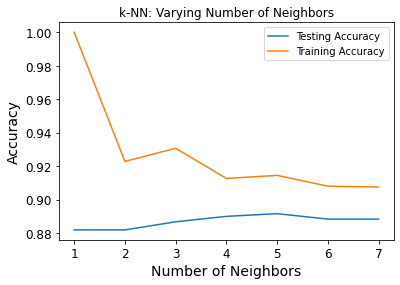

In [69]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    model_clf_knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    model_clf_knn.fit(X_train_trf, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model_clf_knn.score(X_train_trf, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = model_clf_knn.score(X_val_trf, y_val)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Summary Models Score

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVC linear', 'SVC Poly',
              'Decision Tree','Random Forest','KNN', 'Adaboost',
              'Gradient Boosting','XGBoost'
              ],
    'Score': [acc_logreg, acc_svc_lin, acc_svc_poly,
              acc_dt, acc_rf, acc_knn ,acc_ada, acc_grad_boost,acc_xgb
              ],
   })
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Adaboost,90.61
3,Decision Tree,90.45
1,SVC linear,90.13
0,Logistic Regression,89.64
4,Random Forest,89.32
8,XGBoost,89.16
2,SVC Poly,88.83
7,Gradient Boosting,88.83
5,KNN,88.35


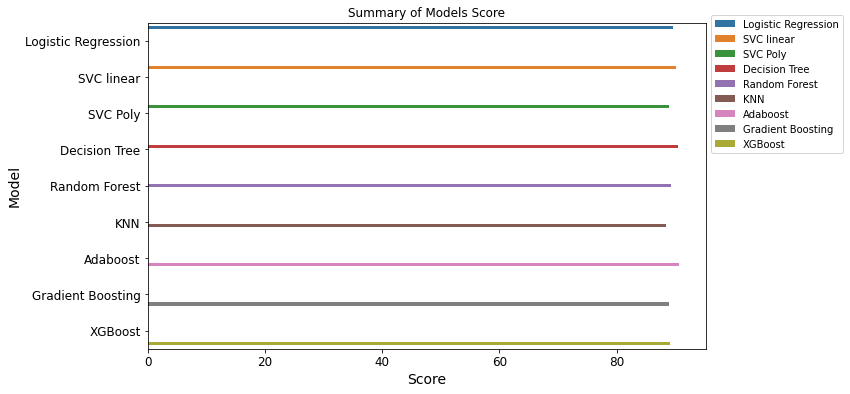

In [71]:
plt.figure(figsize=(10,6))
plt.title("Summary of Models Score")
sns.barplot(x="Score", y="Model", data=models, hue="Model")
plt.legend(bbox_to_anchor=(1.01, 0.6),
           borderaxespad=0)


# ROC AUC Curve

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

In [73]:
log_probs = model_lin.decision_function(X_test)
svc_probs = model_svc_linear.decision_function(X_test)
svc_p_probs = model_svc_poly.decision_function(X_test)
dt_probs = model_tree_clf.predict_proba(X_test)
rf_probs = model_rf_clf.predict_proba(X_test)
ada_probs = ada_clf.predict_proba(X_test)
gd_probs = grad_boost_clf.predict_proba(X_test)
knn_probs = model_clf_knn.predict_proba(X_test)

In [74]:
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
ada_probs = ada_probs[:, 1]
gd_probs = gd_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [75]:
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
ada_auc = roc_auc_score(y_test,ada_probs)
gd_auc = roc_auc_score(y_test,gd_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
log_auc = roc_auc_score(y_test, log_probs)
svc_auc = roc_auc_score(y_test,svc_probs)
svc_p_auc = roc_auc_score(y_test,svc_p_probs)

In [76]:
#r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
gd_fpr, gd_tpr, _ = roc_curve(y_test, gd_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
svc_p_fpr, svc_p_tpr, _ = roc_curve(y_test, svc_p_probs)


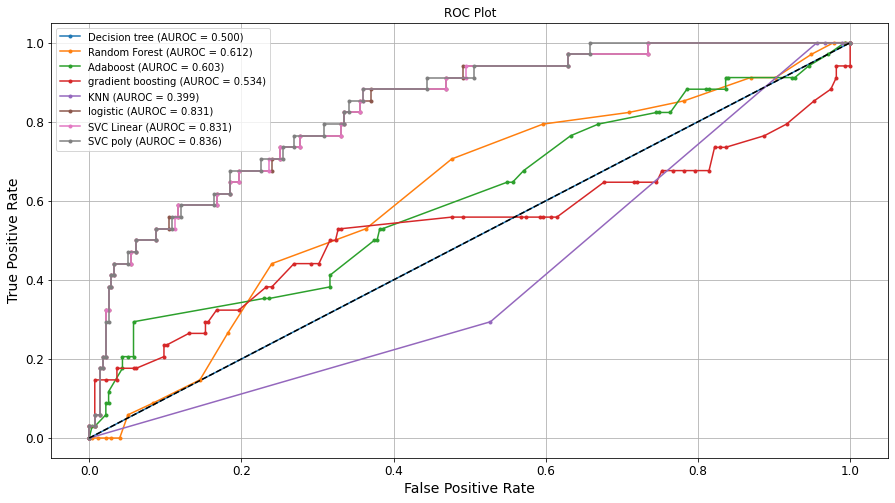

In [77]:
plt.subplots(figsize=(15,8))
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='Adaboost (AUROC = %0.3f)' % ada_auc)
plt.plot(gd_fpr, gd_tpr, marker='.', label='gradient boosting (AUROC = %0.3f)' % gd_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)

plt.plot(log_fpr, log_tpr, marker='.', label='logistic (AUROC = %0.3f)' % log_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC Linear (AUROC = %0.3f)' % svc_auc)
plt.plot(svc_p_fpr, svc_p_tpr, marker='.', label='SVC poly (AUROC = %0.3f)' % svc_p_auc)

# Title

plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)                                            # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
# Show legend
plt.legend() # 
# Show plot
plt.show()

Grafik ROC AUC diatas menunjukan bahwa semakin garis tersebut mendekati satu maka dapat dikatakan semakin akurat karena menunjukan true posotif rate, sedangkan sebaliknya menunjukan ketidak akuratan. Dapat dilihat bahwa KNN memiliki nilai keakuratan yang tidak baik karena nilai menjauhi nilia satu sedangkan nilai keakuratan yang baik dapat dilihat terjadi pada SVC poly.

In [78]:
models_roc = pd.DataFrame({
    'Model': ['Logistic Regression','SVC linear', 'SVC Poly',
              'Decision Tree','Random Forest','KNN', 'Adaboost',
              'Gradient Boosting'
              ],
    'Score': [log_auc, svc_auc, svc_p_auc,
              dt_auc, rf_auc,knn_auc, ada_auc , gd_auc
              ],
   })
models_roc.sort_values(by='Score', ascending=False)

,Model,Score
2,SVC Poly,0.835829
1,SVC linear,0.831230
0,Logistic Regression,0.831123
4,Random Forest,0.611604
6,Adaboost,0.602781
7,Gradient Boosting,0.534171
3,Decision Tree,0.500000
5,KNN,0.398824


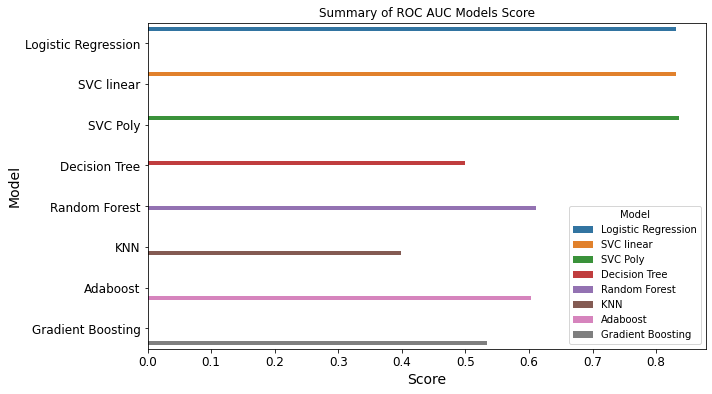

In [79]:
plt.figure(figsize=(10,6))
plt.title("Summary of ROC AUC Models Score")
sns.barplot(x="Score", y="Model", data=models_roc, hue="Model")

# Cross Validation

In [80]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_scores = cross_val_score(model_lin, X_val_trf, y_val, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_scores = cross_val_score(model_svc_linear, X_val_trf, y_val, cv=3)
svc_mean = svc_scores.mean()

svc_scores2 = cross_val_score(model_svc_poly, X_val_trf, y_val, cv=3)
svc_mean2 = svc_scores2.mean()

# Decision Tree
tree_scores = cross_val_score(model_tree_clf, X_val_trf, y_val, cv=3)
tree_mean = tree_scores.mean()

# Random Forest Classifier
rand_scores = cross_val_score(model_rf_clf, X_val_trf, y_val, cv=3)
rand_mean = rand_scores.mean()

# Adaboost 
ada_scores = cross_val_score(ada_clf,X_val_trf, y_val, cv=3)
ada_mean = ada_scores.mean()

# Gradient Boosting
grad_scores = cross_val_score(grad_boost_clf, X_val_trf, y_val, cv=3)
grad_mean = grad_scores.mean()

# XGBoost
xgb_scores = cross_val_score(xgb_clf, X_val_trf, y_val, cv=3)
xgb_mean = xgb_scores.mean()

# KNearestNeighbors

knn_scores = cross_val_score(model_clf_knn, X_val_trf, y_val, cv=3)
knn_mean = knn_scores.mean()




# Create a Dataframe with the results.
d = {'Model': ['Logistic Regression','SVC linear', 'SVC Poly',
              'Decision Tree','Random Forest','KNN', 'Adaboost',
              'Gradient Boosting','XGBoost'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, svc_mean2, tree_mean, rand_mean, knn_mean, ada_mean, grad_mean,xgb_mean]}

result_df = pd.DataFrame(data=d)

In [81]:
result_df = result_df.sort_values(by='Crossval Mean Scores', ascending=False)
result_df

,Model,Crossval Mean Scores
0,Logistic Regression,0.894822
4,Random Forest,0.893204
8,XGBoost,0.893204
5,KNN,0.881877
6,Adaboost,0.880259
7,Gradient Boosting,0.880259
1,SVC linear,0.877023
2,SVC Poly,0.877023
3,Decision Tree,0.875405


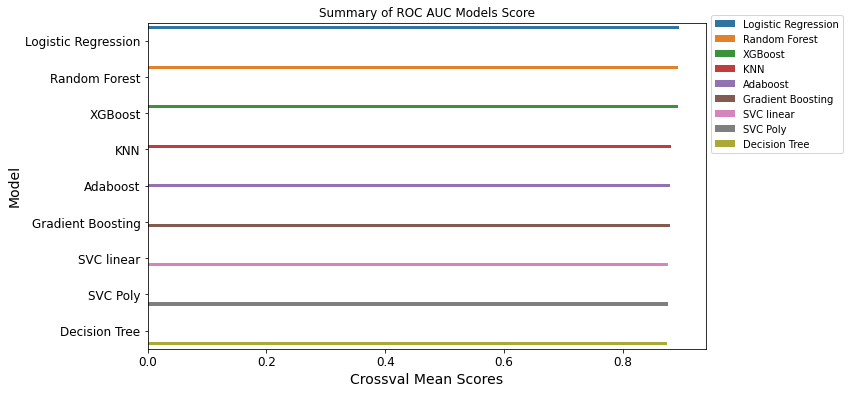

In [82]:
plt.figure(figsize=(10,6))
plt.title("Summary of ROC AUC Models Score")
sns.barplot(x="Crossval Mean Scores", y="Model", data=result_df, hue="Model")
plt.legend(bbox_to_anchor=(1.01, 0.6),
           borderaxespad=0)

cross validation menunjukan bahwa nilai tertinggi didpat oleh logistic regression. Sedangkan nilai terendah terjadi pada model decision tree.

In [83]:
# Cross validate gradient boosting
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model_lin, X_val_trf, y_val)

In [84]:
from sklearn.metrics import accuracy_score
print ("logistic regression: %.2f" % accuracy_score(y_val, y_train_pred))

logistic regression: 0.89


# GridSearchCV

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    
    'algorithm':("SAMME.R","SAMME"),
    'n_estimators': range(50, 300, 20),
    'learning_rate': [1, 0.1, 0.01, 0.05]
}

ada_cv = GridSearchCV(ada_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
ada_cv.fit(X_train_trf, y_train)
best_params = ada_cv.best_params_
print(f"Best paramters: {best_params})")
print(f"Best score: ",ada_cv.best_score_)


Fitting 3 folds for each of 104 candidates, totalling 312 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 312 out of 312 | elapsed:  1.8min finished


Best paramters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 230})
Best score:  0.907535829865927


In [89]:
ada_clf_new = AdaBoostClassifier( n_estimators=230,
    algorithm="SAMME.R", learning_rate=0.05, random_state=random_state)
%time ada_clf_new.fit(X_train_trf, y_train)

CPU times: user 669 ms, sys: 2.36 ms, total: 672 ms
Wall time: 675 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=230, random_state=42)

In [90]:
%time y_ada_clf_new =  ada_clf_new.predict(X_val_trf)
print(classification_report(y_val, y_ada_clf_new))

CPU times: user 58.5 ms, sys: 922 µs, total: 59.5 ms
Wall time: 60.2 ms
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       543
           1       0.77      0.32      0.45        75

    accuracy                           0.91       618
   macro avg       0.84      0.65      0.70       618
weighted avg       0.90      0.91      0.89       618



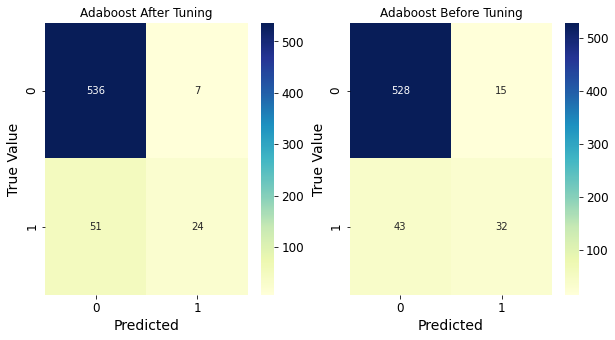

In [91]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Adaboost After Tuning")
cm = confusion_matrix(y_val, y_ada_clf_new)
sns.heatmap(cm, annot=True,fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True Value')

plt.subplot(122)
plt.title("Adaboost Before Tuning")
cm = confusion_matrix(y_val, y_ada_clf)
sns.heatmap(cm, annot=True,fmt='g', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()


Confussion Matrix
> TP = Klien yang telah berlangganan, dan terdeteksi berlangganan

> TN = Klien yang telah berlangganan, dan terdeteksi belum berlangganan

> FP = Klien yang belum berlangganan, dan terdeteksi berlangganan

> FN = Klien yang belum berlangganan, dan terdeteksi belum berlangganan





GridsearchCV digunakan untuk melakukan hyperparameter tunning dimana kita dapat mencari nilai atau parameter yang sesuai. Disini girdsearch saya aplikasikan pada salah satu model yaitu adaboost sehingga ditemukan nilai akurasi sebesar 91%.

# Using Model 

Melakukan percobaan pada model yang telah ada dengan menggunakan data baru untuk melihat hasil dari model yang telah dibuat.

In [534]:
data_baru = [[51,	1, 1, 1, 1,	1, 1,	3, 3,3, 450,	2, 0, 0,	1, -40,	4.000]]
ada_clf_new.predict(data_baru)

array([0])

#Kesimpulan
Hasil akhir dengan data bau menunjukan bahwa nilai yang muncul adalah 0 dimana diartikan sebagai No. Untuk tiap model yang ada sebaiknya dilakukan gridsearchcv sehingga tiap model dapat diketahui nilai akurasi sesungguhnya untuk menentukan mana model dan hyperparameter yang sesui atau tepat untuk digunakan.  